In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

from mypackage import dir
from mypackage.calculates import df_correlations

iso_forest = IsolationForest(contamination=0.1, random_state=42)

In [3]:
# Environment variables
project = 'british'
data = dir.make_dir(project) 
raw = data('raw')
processed = data('processed')
outputs = data('outputs')

In [ ]:
# Ruta al archivo .pkl
file_path = outputs/'encoder.pkl'

with open(file_path, 'rb') as f:
    encoder = pickle.load(f)

In [ ]:
# Función para cargar datos
def cargar_datos(table_name: str) -> pd.DataFrame:
    df = pd.read_parquet(processed / f'{table_name}.parquet.gzip')
    print(f'Loaded table: {table_name}')
    return df

In [ ]:
df = cargar_datos('dataset')

# Eliminar atipicos
df['anomaly'] = iso_forest.fit_predict(df)
df = df[df['anomaly'] == 1].drop(columns='anomaly')

for col in ['status', 'session', 'tecnología_y_software', 'country']:
    df[col] = df[col].astype(float)

df.shape

Loaded table: dataset


(319, 10)

In [ ]:
correlations = df_correlations(df)
correlations.head(20)

,Column_1,Column_2,Correlation,type
56,inversion_inicial,total_amount,0.971742,Strong Positive
57,primera_inversion,total_amount,0.971742,Strong Positive
89,frecuencia_inversiones,numero_inversiones,0.576243,Moderate Positive
58,numero_inversiones,total_amount,0.570881,Moderate Positive
49,frecuencia_inversiones,tenure,-0.507407,Moderate Negative
68,numero_inversiones,inversion_inicial,0.504513,Moderate Positive
78,numero_inversiones,primera_inversion,0.504513,Moderate Positive
4,tenure,status,-0.341469,Weak Negative
59,frecuencia_inversiones,total_amount,0.213446,Weak Positive
9,frecuencia_inversiones,status,0.192798,Weak Positive


In [ ]:
# Eliminar variables correlacionadas
df.drop(['inversion_inicial', 'primera_inversion'], axis=1, inplace=True)

In [ ]:
class_labels = df.columns.to_list()
class_labels = [elemento.replace("_", " ").title() for elemento in class_labels]

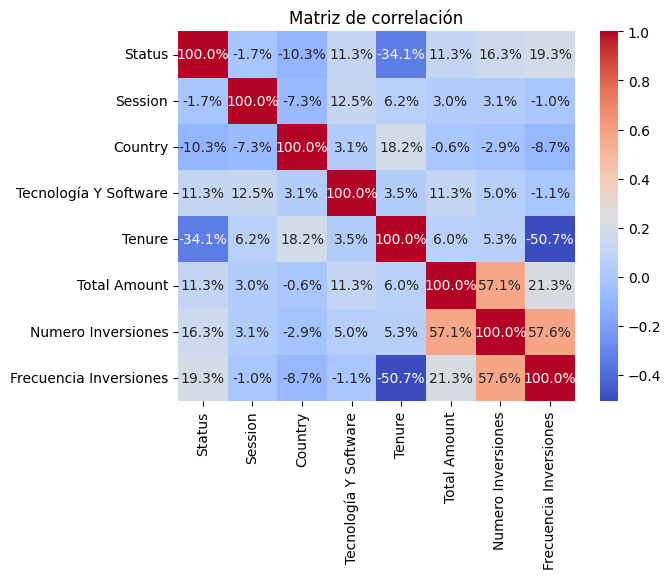

In [ ]:
# Heatmap de correlaciones
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1%',  cmap='coolwarm',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de correlación')
plt.show()

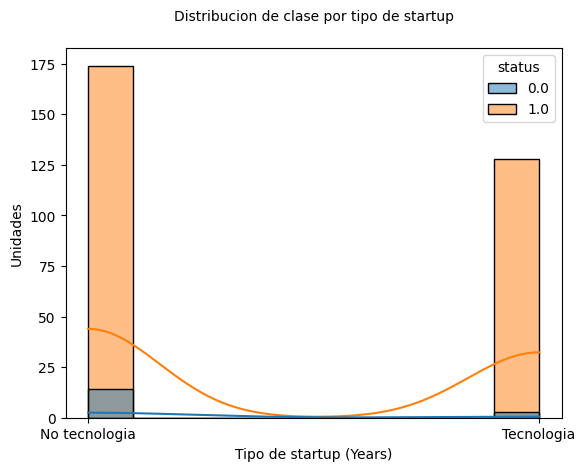

In [ ]:
sns.histplot(data=df, x='tecnología_y_software', hue='status', kde=True)
plt.title('Distribucion de clase por tipo de startup', fontsize=10, pad=20)
plt.xlabel('Clase', fontsize=10)
plt.ylabel('Unidades', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['No tecnologia', 'Tecnologia'], fontsize=10)
plt.show()

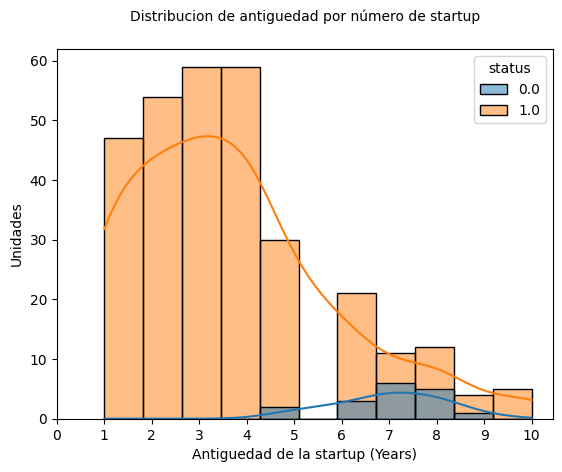

In [18]:
sns.histplot(data=df, x='tenure', hue='status', kde=True)
plt.title('Distribucion de antiguedad por número de startup', fontsize=10, pad=20)
plt.xlabel('Antiguedad de la startup (Years)', fontsize=10)
plt.ylabel('Unidades', fontsize=10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=10)
plt.show()

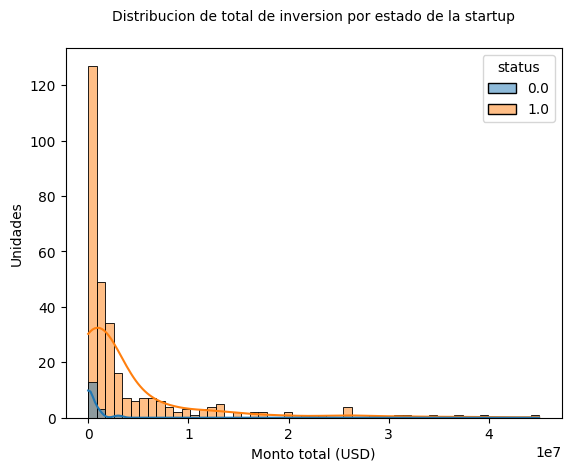

In [19]:
sns.histplot(data=df, x='total_amount', hue='status', kde=True)
plt.title('Distribucion de total de inversion por estado de la startup', fontsize=10, pad=20)
plt.xlabel('Monto total (USD)', fontsize=10)
plt.ylabel('Unidades', fontsize=10)
plt.show()

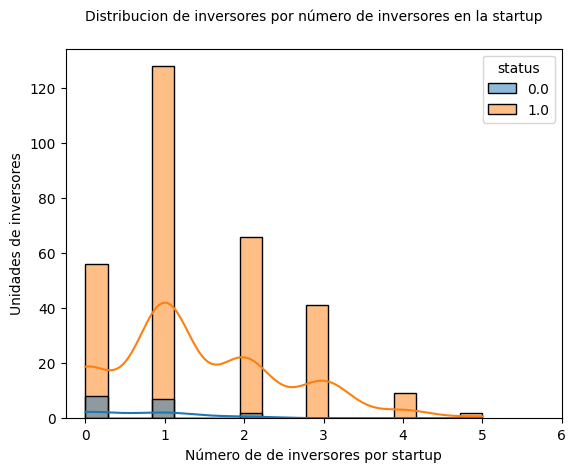

In [20]:
sns.histplot(data=df, x='numero_inversiones', hue='status', kde=True)
plt.title('Distribucion de inversores por número de inversores en la startup', fontsize=10, pad=20)
plt.xlabel('Número de de inversores por startup', fontsize=10)
plt.ylabel('Unidades de inversores', fontsize=10)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2', '3', '4', '5', '6'], fontsize=10)
plt.show()

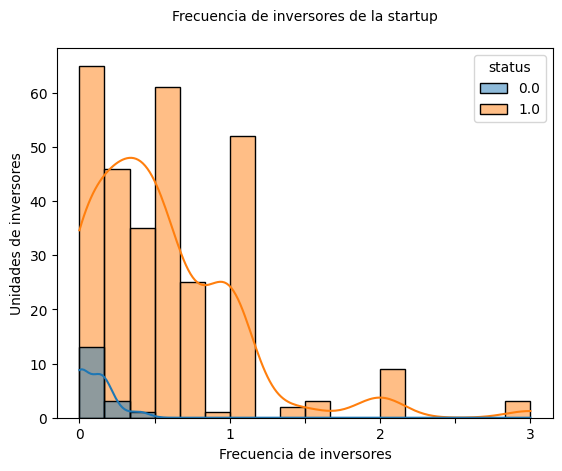

In [21]:
sns.histplot(data=df, x='frecuencia_inversiones', hue='status', kde=True)
plt.title('Frecuencia de inversores de la startup', fontsize=10, pad=20)
plt.xlabel('Frecuencia de inversores', fontsize=10)
plt.ylabel('Unidades de inversores', fontsize=10)
plt.xticks(ticks=[0, 0.5, 1, 1.5, 2, 2.5, 3], labels=['0', '', '1', '', '2', '', '3'], fontsize=10)
plt.show()

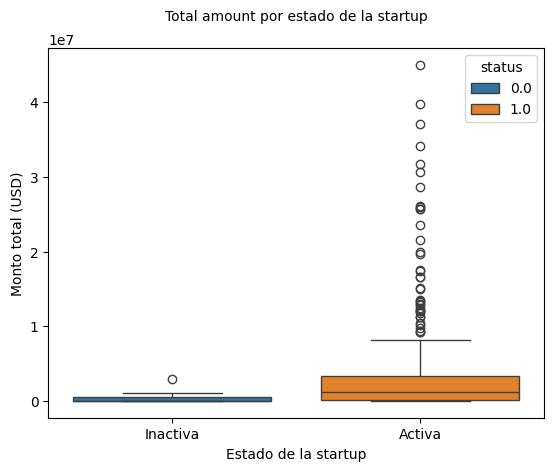

In [22]:
sns.boxplot(data=df, x='status', y='total_amount', hue='status')
plt.title('Total amount por estado de la startup', fontsize=10, pad=20)
plt.xlabel('Estado de la startup', fontsize=10)
plt.ylabel('Monto total (USD)', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Inactiva', 'Activa'], fontsize=10)
plt.show()

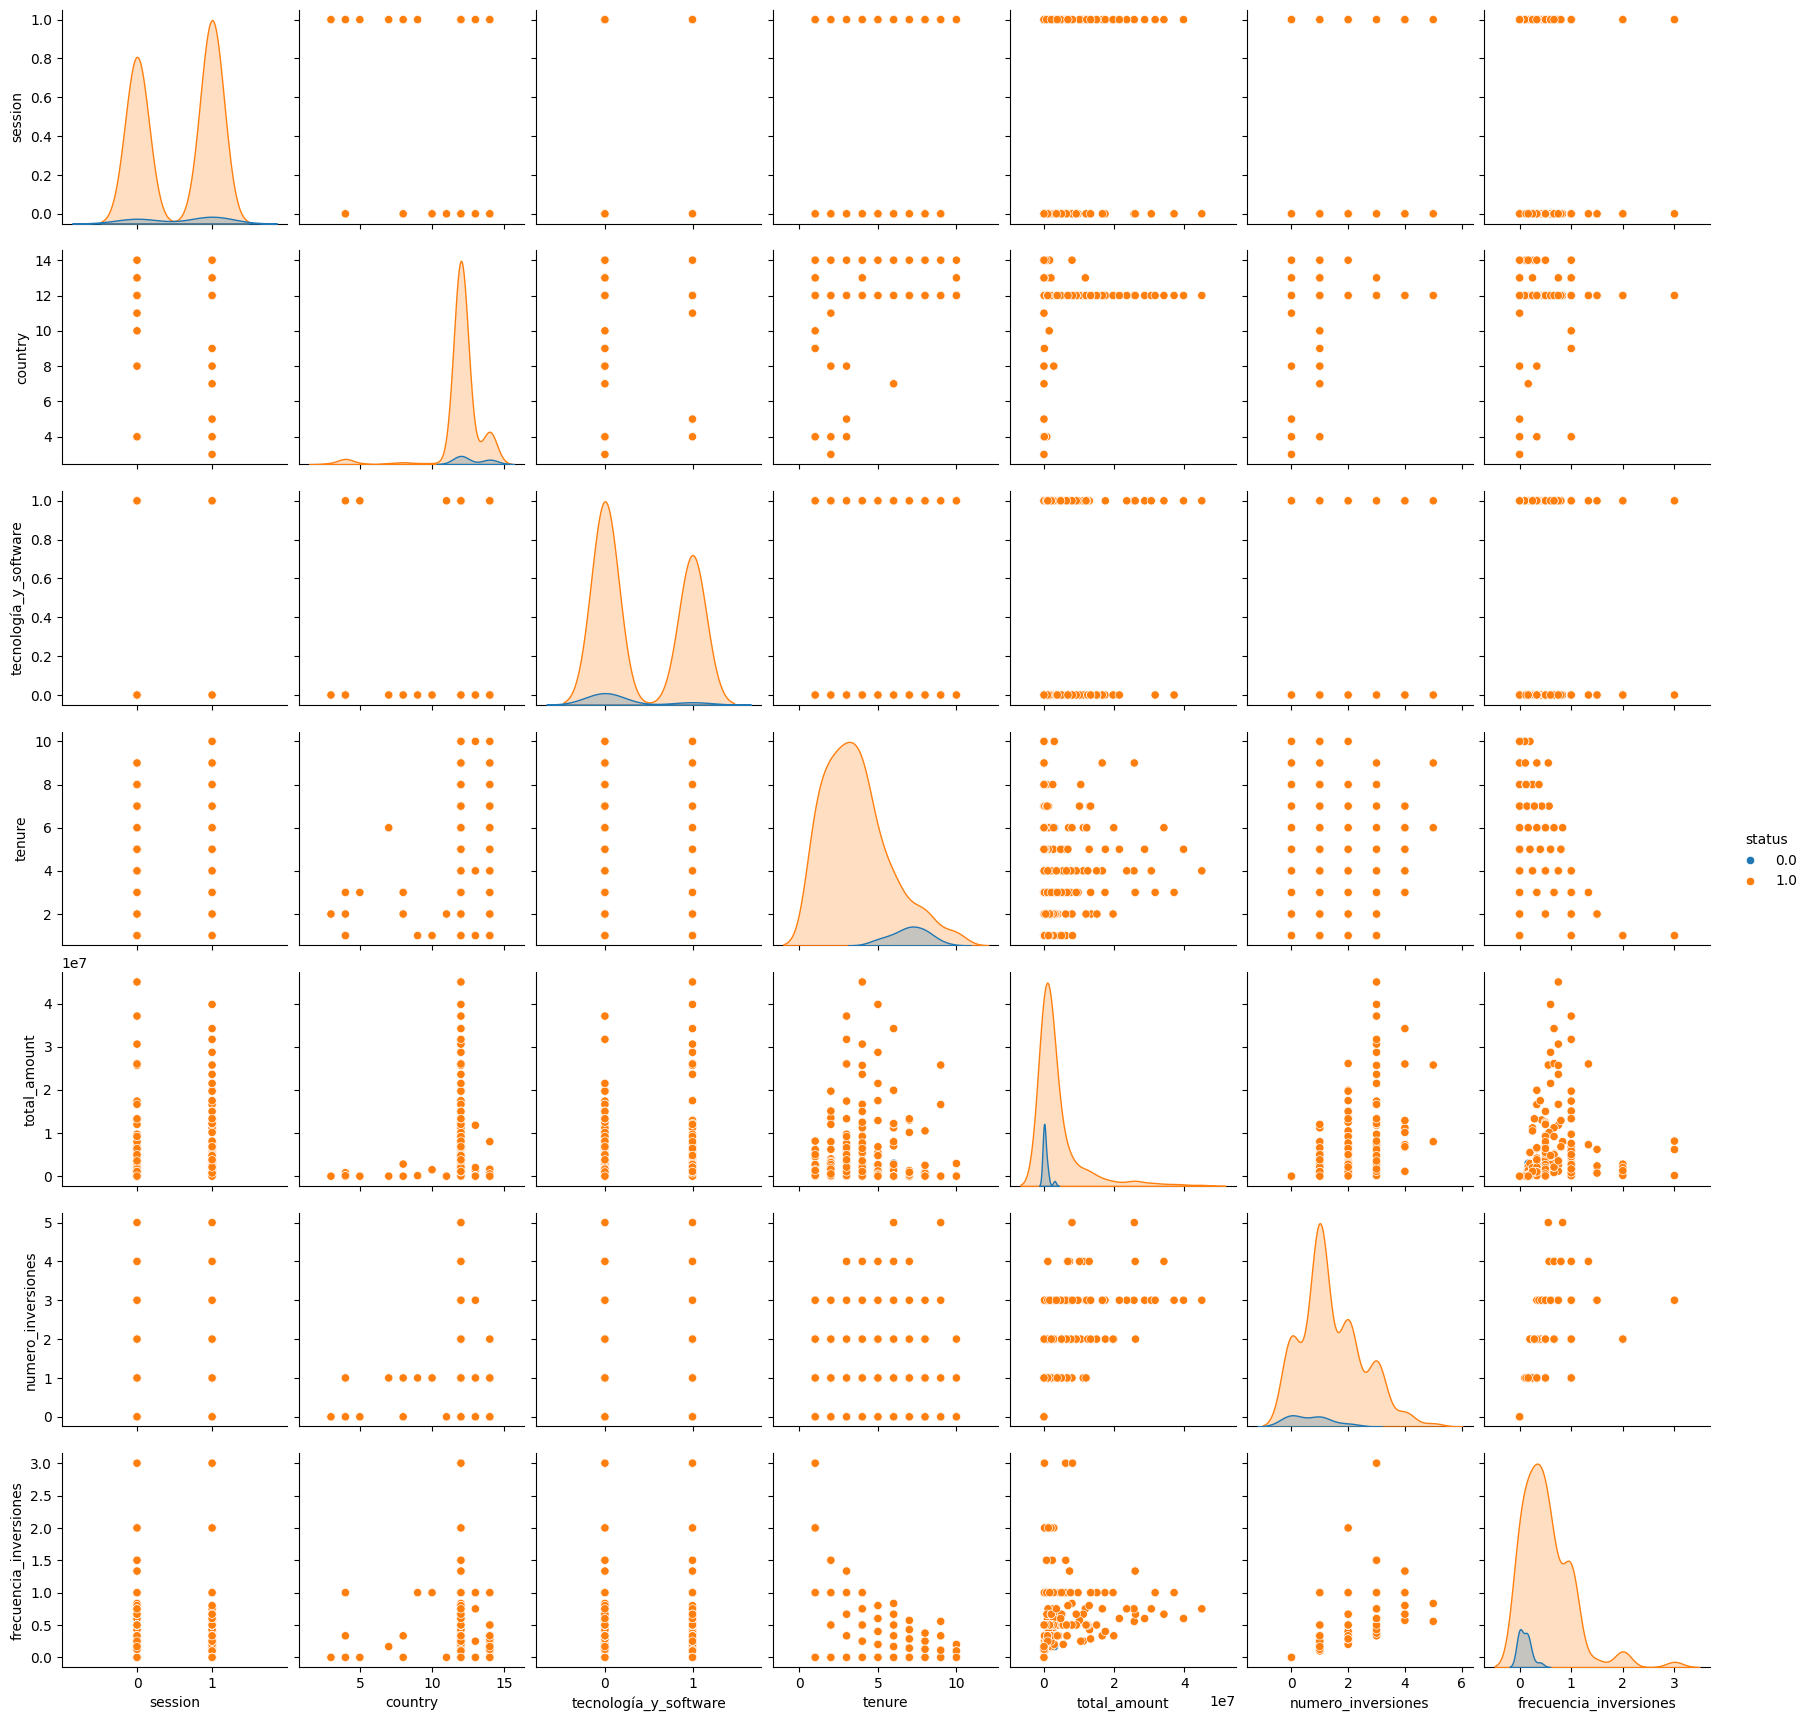

In [23]:
sns.pairplot(df, hue='status')
plt.show()

In [60]:
df2 = df.copy()
df2 = df2.loc[:,['country']]
df2['country'] = df2['country'].astype(int)
df2['country2'] = encoder.inverse_transform(df2['country'])
df2 = df2.drop_duplicates()
df2.head()

,country,country2
646,14,NaN
666,12,USA
31,13,United Kingdom
34,4,Canada
84,3,Brazil
